In [1]:
import numpy as np

In [2]:
n = 20
X = np.random.uniform(-3, 5, size=n)

In [3]:
b = [45, -6, 1.2, -1, 0.1]
hata = np.random.normal(0, 4, size=n)

In [4]:
y = b[0] \
+ b[1] * X \
+ b[2] * X**2 \
+ b[3] * X**3 \
+ b[4] * X**4 + hata

In [5]:
import matplotlib.pyplot as plt

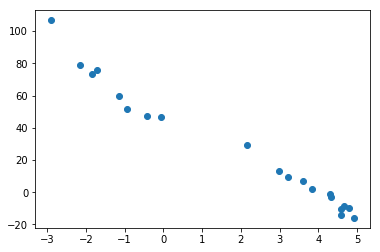

In [6]:
plt.scatter(X, y)

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X = X.reshape(n, 1)
y = y.reshape(n, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import PolynomialFeatures 

In [11]:
polyClassifier = PolynomialFeatures(degree=3)

In [12]:
polyClassifier.fit(X,y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [13]:
polyClassifier.fit_transform(X)

array([[ 1.00000000e+00, -5.85807086e-02,  3.43169942e-03,
        -2.01031384e-04],
       [ 1.00000000e+00,  4.58389209e+00,  2.10120667e+01,
         9.63170460e+01],
       [ 1.00000000e+00, -9.43739796e-01,  8.90644802e-01,
        -8.40536944e-01],
       [ 1.00000000e+00,  2.98858037e+00,  8.93161263e+00,
         2.66928422e+01],
       [ 1.00000000e+00, -2.90858569e+00,  8.45987073e+00,
        -2.46062590e+01],
       [ 1.00000000e+00,  4.67188799e+00,  2.18265374e+01,
         1.01971138e+02],
       [ 1.00000000e+00, -2.15173656e+00,  4.62997021e+00,
        -9.96247615e+00],
       [ 1.00000000e+00,  4.93193060e+00,  2.43239394e+01,
         1.19963981e+02],
       [ 1.00000000e+00,  3.61378988e+00,  1.30594773e+01,
         4.71942069e+01],
       [ 1.00000000e+00,  2.16867751e+00,  4.70316214e+00,
         1.01996419e+01],
       [ 1.00000000e+00,  4.57496772e+00,  2.09303296e+01,
         9.57555822e+01],
       [ 1.00000000e+00,  3.22239324e+00,  1.03838182e+01,
      

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
degree = [1,2,3,4,5,6,7,8]
poly_train = []
poly_test = []
for dg in degree:
    polyClassifier = PolynomialFeatures(degree=dg, include_bias=False)
    xp = polyClassifier.fit_transform(X_train)
    print(xp.shape)
    classifier = LinearRegression()
    classifier.fit(xp, y_train)
    poly_train.append(classifier.score(xp, y_train))
    poly_test.append(classifier.score(polyClassifier.transform(X_test), y_test))

(16, 1)
(16, 2)
(16, 3)
(16, 4)
(16, 5)
(16, 6)
(16, 7)
(16, 8)


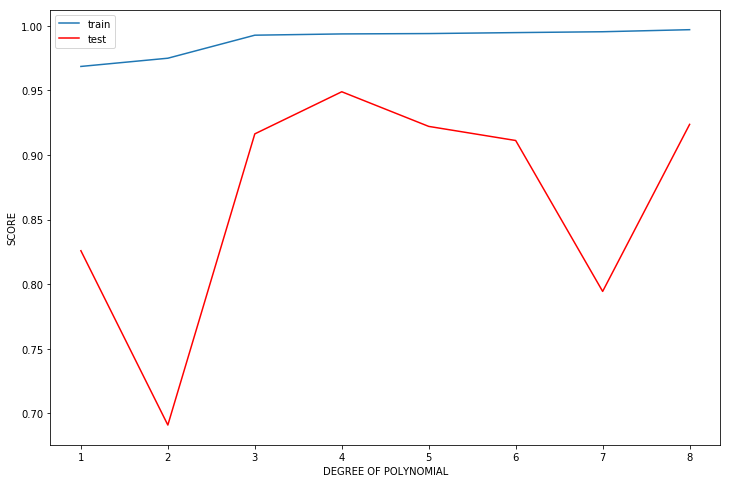

In [16]:
plt.figure(figsize=(12,8))
plt.plot(degree, poly_train, label='train')
plt.plot(degree, poly_test, color='red', label='test')
plt.xlabel('DEGREE OF POLYNOMIAL')
plt.ylabel('SCORE')
plt.legend()

In [17]:
polyClassifier4 = PolynomialFeatures(degree=4)
pc4 = polyClassifier4.fit_transform(X_train)

In [18]:
linear4 = LinearRegression()

In [19]:
linear4.fit(pc4, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
linear4.score(pc4, y_train)

0.9937665989974397

In [21]:
linear4.score(polyClassifier4.transform(X_test), y_test)

0.9490031385060327

In [22]:
linear4.intercept_

array([45.07373807])

In [23]:
linear4.coef_ # we can compare the results with "b"

array([[ 0.        , -9.56148056,  1.415371  , -0.71998892,  0.0663558 ]])

In [24]:
b #results are close to each other

[45, -6, 1.2, -1, 0.1]

In [25]:
y_pred = linear4.predict(pc4)

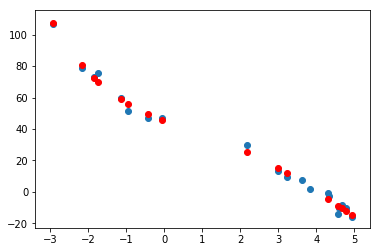

In [26]:
plt.scatter(X, y)
plt.scatter(X_train, y_pred, color='red')